In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [41]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [42]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

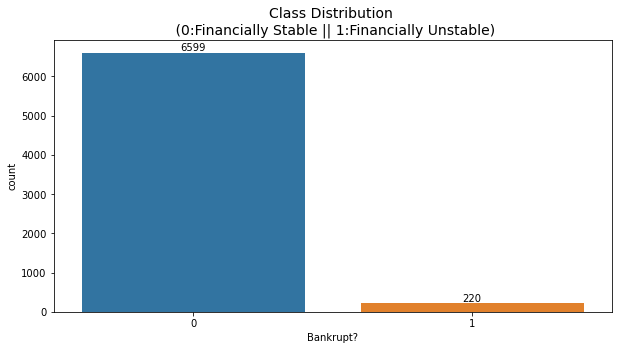

In [43]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [44]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [45]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

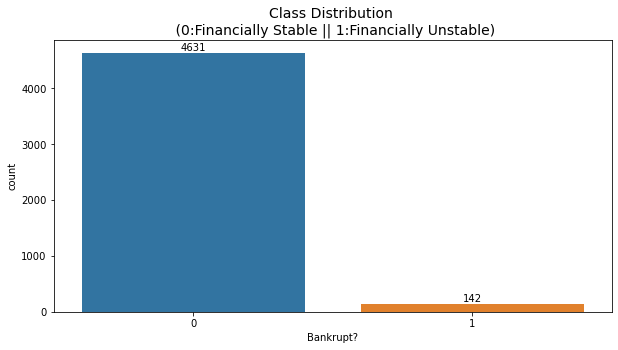

In [46]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [47]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

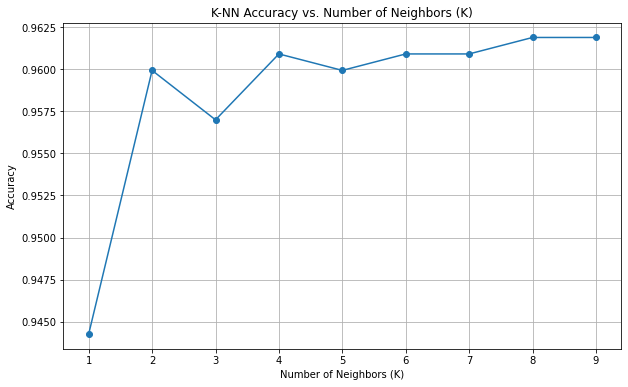

In [48]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_val_pred = knn_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [49]:
k = 8
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [50]:
# Step 4: Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [51]:
# Step 5: Predict on the validation data
y_val_pred = knn_classifier.predict(X_val)

In [52]:
# Step 6: Evaluate the model on the validation data
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_precision = precision_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)
print("Precision score:", validation_precision)

Validation Accuracy: 0.9618768328445748
Precision score: 0.0


In [53]:
conf_matrix_validation = confusion_matrix(y_val, y_val_pred)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[984   0]
 [ 39   0]]


In [54]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.96
Precision: nan
Recall: 0.00
F1 Score: nan


In [55]:
# Step 7: Predict on the testing data
y_test_pred = knn_classifier.predict(X_test)

In [56]:
# Step 8: Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9618768328445748


In [57]:
conf_matrix_testing = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[984   0]
 [ 39   0]]


In [58]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.96
Precision: nan
Recall: 0.00
F1 Score: nan


<H1>SMOTE</H1>

In [59]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
smote = SMOTE(sampling_strategy=1, random_state=42)

In [61]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

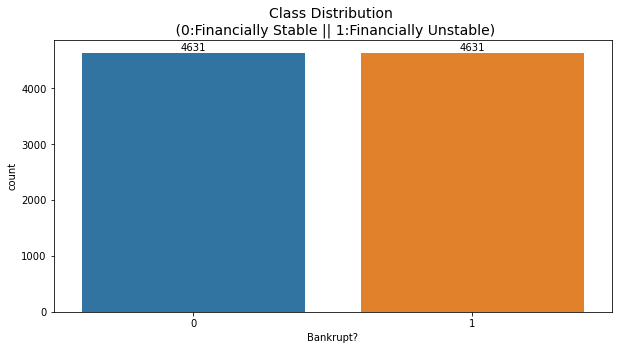

In [62]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_resampled)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

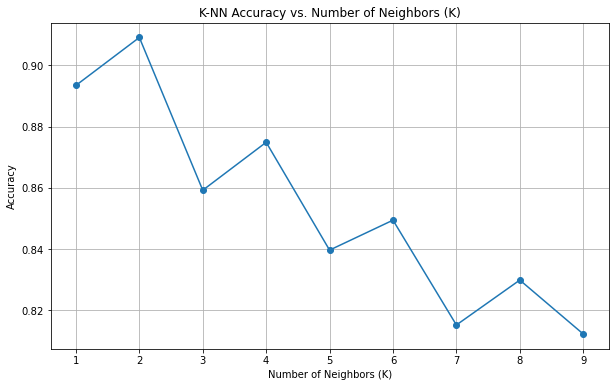

In [63]:
k_values = range(1, 10)

# Initialize lists to store accuracy scores for each K
accuracy_scores = []

# Iterate through different values of K
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_resampled, y_resampled)
    y_val_pred = knn_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_scores.append(accuracy)

# Plot the results to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title("K-NN Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [64]:
k = 2
knn_classifier_smote = KNeighborsClassifier(n_neighbors=k)

In [65]:
knn_classifier_smote.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=2)

In [66]:
y_val_pred = knn_classifier_smote.predict(X_val)

In [67]:
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.9090909090909091


In [68]:
conf_matrix_validation = confusion_matrix(y_val, y_val_pred)
print("Confusion matrix")
print(conf_matrix_validation)

Confusion matrix
[[925  59]
 [ 34   5]]


In [69]:
TN, FP, FN, TP = conf_matrix_validation.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.91
Precision: 0.08
Recall: 0.13
F1 Score: 0.10


In [70]:
y_test_pred = knn_classifier_smote.predict(X_test)

In [71]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9110459433040078


In [72]:
conf_matrix_testing = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix")
print(conf_matrix_testing)

Confusion matrix
[[923  61]
 [ 30   9]]


In [73]:
TN, FP, FN, TP = conf_matrix_testing.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display other metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.91
Precision: 0.13
Recall: 0.23
F1 Score: 0.17
